# Offline diagnostics for the CASTLE single output networks following Rasp et al. (2018) architecture

# Cross Section Plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [3]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [5]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_models, get_save_plot_folder
from neural_networks.model_diagnostics import ModelDiagnostics


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [6]:
from pathlib import Path

## Load trained CASTLE models

In [7]:
argv  = ["-c", "../output_castle/training_5_mirrored/cfg_castle_NN_Creation.yml"]
plot_dir = Path("../output_castle/training_5_mirrored/plots_offline_evaluation/plot_cross_section/")

In [8]:
castle_setup = SetupDiagnostics(argv)

In [9]:
castle_models = load_models(castle_setup)


Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_0_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_1_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_2_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_3_model.h5

Load model: /work/bd1179/b309247/pychar

In [10]:
len(castle_models)

1

In [11]:
len(castle_models['castleNN'])

65

In [12]:
# Note: keys are variables not strings
castle_models['castleNN'].keys()

dict_keys(['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 'tphystnd-976.33', 'tphystnd-992.56', 'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56', 'fsnt', 'fsns', 'flnt', 'fl

## Vertical cross-section plots

In [13]:
# This variable does not exist in the code (but key nn_type is the same)
castle_model_type = "castleNN"
castle_setup.model_type = castle_model_type

In [14]:
castle_md = ModelDiagnostics(setup=castle_setup, 
                             models=castle_models[castle_model_type]) 

In [ ]:
castle_md

In [ ]:
dict_keys = castle_models['castleNN'].keys()

### Single Variable

In [ ]:
from utils.variable import Variable_Lev_Metadata

In [18]:
var = Variable_Lev_Metadata.parse_var_name("tphystnd-0")
var_keys = [k for k in dict_keys if var.var.value in str(k)]

Plotting double_yz for variable tphystnd
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.


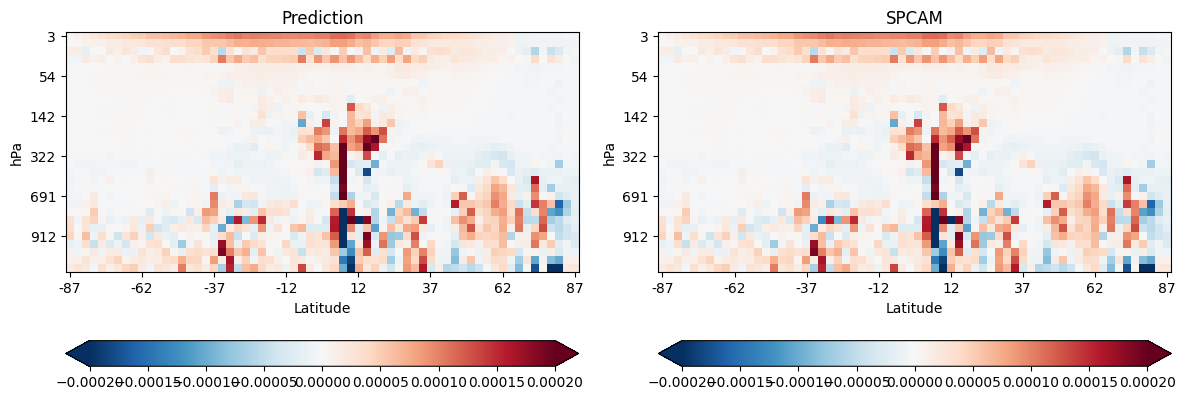

In [19]:
fig, axes = castle_md.plot_double_yz(var, var_keys, itime=1, nTime=False, ilon=64, diff=False,
                                     cmap='RdBu_r', stats=False)

fig.show()

Plotting double_yz for variable tphystnd
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.


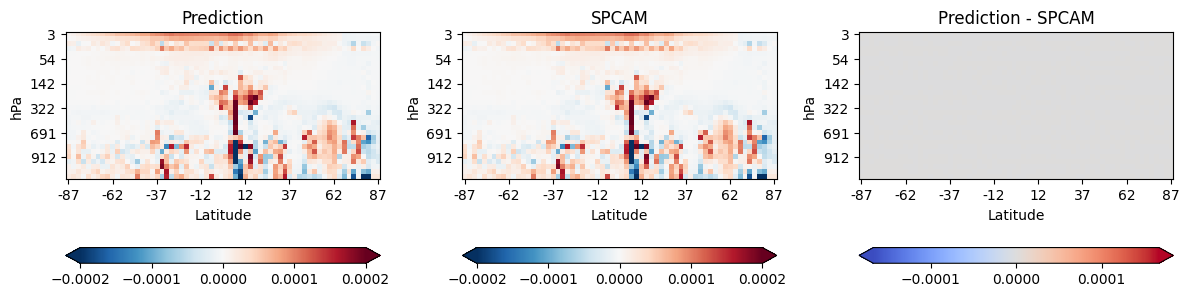

In [20]:
fig, axes = castle_md.plot_double_yz(var, var_keys, itime=1, nTime=False, ilon=64, diff=True,
                                     cmap='RdBu_r', stats=False)

fig.show()

In [21]:
_ = castle_md.plot_double_yz(var, var_keys, itime=1, nTime=False, ilon=64, diff=False,
                                     cmap='RdBu_r', save=plot_dir, stats=False, show_plot=False)


Plotting double_yz for variable tphystnd
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Validation batch size = 8192.
Saved plot tphystnd-992.56_map_time-1.png.
Closed plot for 

Plotting double_yz for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch size = 8192.
Time samples: 90
Validation batch si

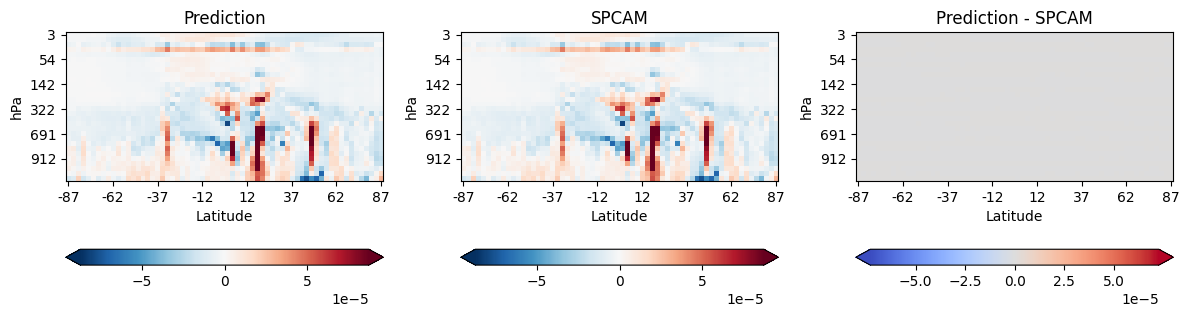

In [22]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
fig, axes = castle_md.plot_double_yz(var, var_keys, itime='mean', nTime=90, ilon=64, diff=True,
                                     cmap='RdBu_r', stats=False)

fig.show()

### All variables 3d variables

In [18]:
def get_save_str(idx_time, num_time=False, idx_lon=False, 
                 show_diff=False, statistics=False):
    if type(idx_time) is int:
        idx_time_str = f"step-{idx_time}"
    elif type(idx_time) is str:
        if num_time:
            idx_time_str = f"{idx_time}-{num_time}"
        else:
            idx_time_str = f"{idx_time}-all"
    else:
        raise ValueError(f"Unkown value for idx_time: {idx_time}")

    idx_lon_str = f"_ilon-{idx_lon}" if idx_lon else ""
    stats_str =  f"_stats-{statistics}" if statistics else ""
    diff_str = "_with_diff" if show_diff else "_no_diff"
    
    return idx_time_str + idx_lon_str + stats_str + diff_str
        

In [19]:
# only 3d
three_d_str = ["tphystnd-3.64", "phq-3.64"] 
three_d_keys = [Variable_Lev_Metadata.parse_var_name(var_str) for var_str in three_d_str]

dict_keys = castle_models['castleNN'].keys()

In [20]:
# Not function parameters, uses variables that are set in Notebook cells!!
def run_plot_yz():
    save_dir = Path(plot_dir, get_save_str(i_time, num_time=n_time, idx_lon=i_lon, 
                                       show_diff=diff, statistics=stats))
    Path(save_dir).mkdir(parents=True, exist_ok=True)


    for var in three_d_keys:
        print(var)
        var_keys = [k for k in dict_keys if var.var.value in str(k)]

        _ = castle_md.plot_double_yz(var, var_keys, itime=i_time, nTime=n_time, ilon=i_lon, diff=diff,
                                     cmap='RdBu_r', stats=stats, show_plot=False, save=save_dir)

#### Time step 1 without diff

In [ ]:
i_time = 1
n_time = False
i_lon = 64
diff = False
stats = False

run_plot_yz()

#### Time step 1 with diff

In [ ]:
i_time = 1
n_time = False
i_lon = 64
diff = True
stats = False

run_plot_yz()

#### Mean without diff

In [21]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90 
# Or: 120 as Nando did
i_time = "mean"
n_time = 1440
i_lon = 64
diff = False
stats = False

run_plot_yz()


tphystnd-3.64
Plotting double_yz for variable tphystnd
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation bat

#### Mean with diff

In [22]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
i_time = "mean"
n_time = 1440
i_lon = 64
diff = True
stats = False

run_plot_yz()

tphystnd-3.64
Plotting double_yz for variable tphystnd
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation bat

#### Mean no diff, ilon mean, stats r2

In [ ]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = False
stats = "r2"

run_plot_yz()


tphystnd-3.64
Plotting double_yz for variable tphystnd
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation batch size = 8192.
Time samples: 1440
Validation bat

#### Mean with diff, ilon mean, stats r2

In [ ]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = True
stats = "r2"

run_plot_yz()


#### Mean no diff, ilon mean, stats mse

In [ ]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = False
stats = "mse"

run_plot_yz()

#### Mean with diff, ilon mean, stats mse

In [ ]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = True
stats = "mse"

run_plot_yz()